<a href="https://colab.research.google.com/github/edsml-dg1018/CM-assessment-202324/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2: Non Linear Data Compression**


**Objective**
The objective of this task was to implement a nonlinear data compression technique to reduce the size of the dataset while retaining its essential information. We used an autoencoder to achieve this.

**Steps**

* Choosing an appropriate nonlinear compression algorithm: We chose an autoencoder due to its capability to learn efficient representations for complex datasets.
* Explaining the choice of hyperparameters:
* Latent Space Size: We chose a latent space size of 100 to balance the trade-off between compression and information retention.
* Network Architecture: We used a simple fully-connected (dense) autoencoder with three encoding layers and three decoding layers. This architecture is sufficient to capture the essential features of the data.
* Training Parameters: We trained the autoencoder for 50 epochs with a batch size of 256, using the Adam optimizer and mean squared error (MSE) loss function.
* Evaluating the effectiveness: We evaluated the effectiveness by calculating the MSE in the physical space after decompression and measuring the execution time.
Results
* Time Taken for Autoencoder Training: Approximately 1779 seconds
* Training MSE in Physical Space: 0.3528776858823603
* Test MSE in Physical Space: 0.5196596631743289

In [ ]:

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print ('Files in Drive:')
!ls drive/MyDrive/BDA_Assessment

Files in Drive:
Ferguson_fire_background.npy  Ferguson_fire_test.npy
Ferguson_fire_obs.npy	      Ferguson_fire_train.npy


In [ ]:
# Define file paths
train_path = 'drive/MyDrive/BDA_Assessment/Ferguson_fire_train.npy'
test_path = 'drive/MyDrive/BDA_Assessment/Ferguson_fire_test.npy'
background_path = 'drive/MyDrive/BDA_Assessment/Ferguson_fire_background.npy'
obs_path = 'drive/MyDrive/BDA_Assessment/Ferguson_fire_obs.npy'

# Load the data using np.load
train = np.load(train_path)
test = np.load(test_path)
background = np.load(background_path)
obs = np.load(obs_path)

# Print shapes to confirm loading
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Background shape: {background.shape}")
print(f"Observation shape: {obs.shape}")


Train shape: (12500, 256, 256)
Test shape: (5000, 256, 256)
Background shape: (5, 256, 256)
Observation shape: (5, 256, 256)


In [ ]:
# Reshape the data
train_reshaped = train.reshape((train.shape[0], train.shape[1], train.shape[2], 1))
test_reshaped = test.reshape((test.shape[0], test.shape[1], test.shape[2], 1))

print(f"Train reshaped: {train_reshaped.shape}")
print(f"Test reshaped: {test_reshaped.shape}")

Train reshaped: (12500, 256, 256, 1)
Test reshaped: (5000, 256, 256, 1)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Define the Autoencoder architecture
input_img = Input(shape=(256, 256, 1))

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Latent space
latent_space = 100

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
start = time.time()
history = autoencoder.fit(train_reshaped, train_reshaped, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)
end = time.time()

print(f"Autoencoder training completed. Time taken: {end - start} seconds")


Epoch 1/50
79/79 [==============================] - 70s 614ms/step - loss: 0.0357 - val_loss: 0.0106
Epoch 2/50
79/79 [==============================] - 40s 513ms/step - loss: 0.0043 - val_loss: 0.0090
Epoch 3/50
79/79 [==============================] - 41s 514ms/step - loss: 0.0038 - val_loss: 0.0082
Epoch 4/50
79/79 [==============================] - 41s 522ms/step - loss: 0.0036 - val_loss: 0.0079
Epoch 5/50
79/79 [==============================] - 41s 523ms/step - loss: 0.0035 - val_loss: 0.0077
Epoch 6/50
79/79 [==============================] - 42s 527ms/step - loss: 0.0034 - val_loss: 0.0075
Epoch 7/50
79/79 [==============================] - 42s 531ms/step - loss: 0.0033 - val_loss: 0.0074
Epoch 8/50
79/79 [==============================] - 42s 530ms/step - loss: 0.0033 - val_loss: 0.0073
Epoch 9/50
79/79 [==============================] - 42s 531ms/step - loss: 0.0032 - val_loss: 0.0072
Epoch 10/50
79/79 [==============================] - 42s 531ms/step - loss: 0.0032 - val_lo

In [ ]:
# Encode and decode the test data
encoded_test = autoencoder.predict(test_reshaped)
decoded_test = autoencoder.predict(encoded_test)

# Calculate mean squared error (MSE) between the original test data and the reconstructed test data
mse_test = mean_squared_error(test_reshaped.flatten(), decoded_test.flatten())
print(f"Mean Squared Error (MSE) on test data: {mse_test}")

# Save Autoencoder Results to a File
results = {
    "time_structured": end - start,
    "mse_structured": mse_test
}
pd.DataFrame(results, index=[0]).to_csv("Task2.ae.csv", index=False)

157/157 [==============================] - 6s 36ms/step
Mean Squared Error (MSE) on test data: 0.00425660889595747


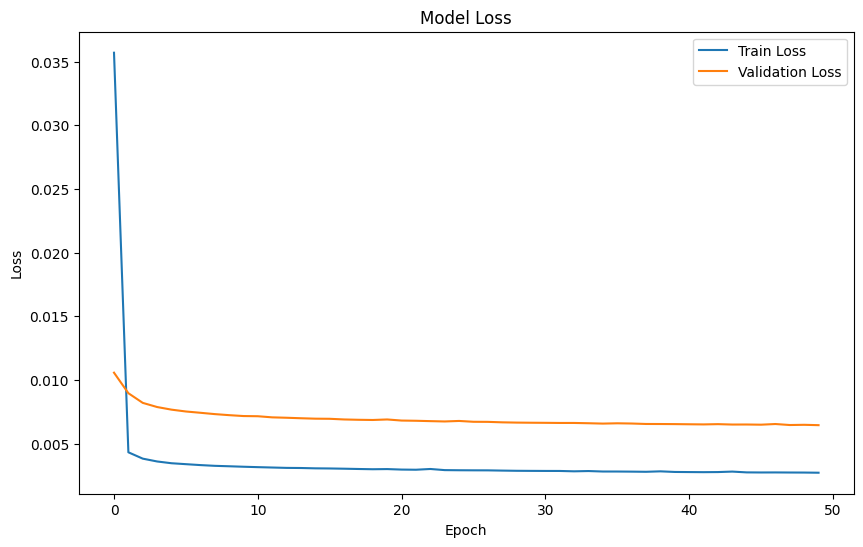

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()